### Importação das biliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importa o knn
from sklearn.neighbors import KNeighborsClassifier
# importa a decision tree
from sklearn import tree
# importa o random forest
from sklearn.ensemble import RandomForestClassifier
# importa o módulo de métricas
from sklearn import metrics
# importa a função auxiliar para fazer a divisao dos dados
from sklearn.model_selection import train_test_split
# importa o encoder para transformar as classes em texto em números
from sklearn.preprocessing import LabelEncoder
# importa o standard scaler para normalizar os dados numéricos
from sklearn.preprocessing import StandardScaler
# importa o minmax scaler para normalizar os dados numéricos
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from skopt import BayesSearchCV

from hyperopt import fmin, tpe, hp
from hyperopt.pyll import scope


### Tratamento dos dados

In [5]:
# Importa o csv de treino e teste das classes e remove as linhas que possuem idade, porto de embarque ou tarifa nulas
train_x = pd.read_csv('train.csv')
train_x = train_x.dropna(subset=['Age']).dropna(subset=['Embarked']).dropna(subset=['Fare'])
train_y = train_x['Survived']
train_x.pop('Survived')
test_x = pd.read_csv('test.csv')
test_y = pd.read_csv('gender_submission.csv')
merged = pd.merge(test_x, test_y, on='PassengerId')
merged = merged.dropna(subset=['Age']).dropna(subset=['Embarked']).dropna(subset=['Fare'])
test_x = merged.drop(['Survived'], axis=1)
test_y = merged['Survived']

# Removendo colunas que não serão utilizadas
train_x.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_x.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Transformando a variável Sexo para numérica (male e female para 1 e 0, respectivamente) e a variável Embarked para numérica (C, Q e S para 0, 1 e 2, respectivamente)
le = LabelEncoder()
le.fit(train_x['Sex'])
train_x['Sex'] = le.transform(train_x['Sex'])
le.fit(test_x['Sex'])
test_x['Sex'] = le.transform(test_x['Sex'])

le.fit(train_x['Embarked'])
train_x['Embarked'] = le.transform(train_x['Embarked'])
le.fit(test_x['Embarked'])
test_x['Embarked'] = le.transform(test_x['Embarked'])

train_x.head()
test_x.head()

# Normalizando os dados com standard scaler
# scaler = StandardScaler()
# scaler.fit(train_x[['Age']])
# train_x['Age'] = scaler.transform(train_x[['Age']])
# scaler.fit(test_x[['Age']])
# test_x['Age'] = scaler.transform(test_x[['Age']])
# scaler.fit(train_x[['Fare']])
# train_x['Fare'] = scaler.transform(train_x[['Fare']])
# scaler.fit(test_x[['Fare']])
# test_x['Fare'] = scaler.transform(test_x[['Fare']])

# Normalizando os dados com min max scaler
scaler = MinMaxScaler()
scaler.fit(train_x[['Age']])
train_x['Age'] = scaler.transform(train_x[['Age']])
scaler.fit(test_x[['Age']])
test_x['Age'] = scaler.transform(test_x[['Age']])
scaler.fit(train_x[['Fare']])
train_x['Fare'] = scaler.transform(train_x[['Fare']])
scaler.fit(test_x[['Fare']])
test_x['Fare'] = scaler.transform(test_x[['Fare']])

# Normalizando os dados com divisão pelo máximo
# test_x['Age'] = test_x['Age'] / test_x['Age'].max()
# test_x['Fare'] = test_x['Fare'] / test_x['Fare'].max()
# train_x['Age'] = train_x['Age'] / train_x['Age'].max()
# train_x['Fare'] = train_x['Fare'] / train_x['Fare'].max()


### Treinamento do modelo KNN

In [6]:
# # Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=19)

#Treinamos o modelo utilizando treino X e treino Y
knn.fit(train_x, train_y)

# Realizando a predição com o modelo treinado
pred_y = knn.predict(test_x)

print("Accuracy:", metrics.accuracy_score(pred_y, test_y))
print("F1-score:", metrics.f1_score(pred_y, test_y, average='micro'))
print("Precision:", metrics.precision_score(pred_y, test_y, average='micro'))
print("Recall:", metrics.recall_score(pred_y, test_y, average='micro'))

Accuracy: 0.8851963746223565
F1-score: 0.8851963746223565
Precision: 0.8851963746223565
Recall: 0.8851963746223565


### Treinamento do modelo Decision Tree

Accuracy: 0.8338368580060423
F1-score: 0.8338368580060423
Precision: 0.8338368580060423
Recall: 0.8338368580060423


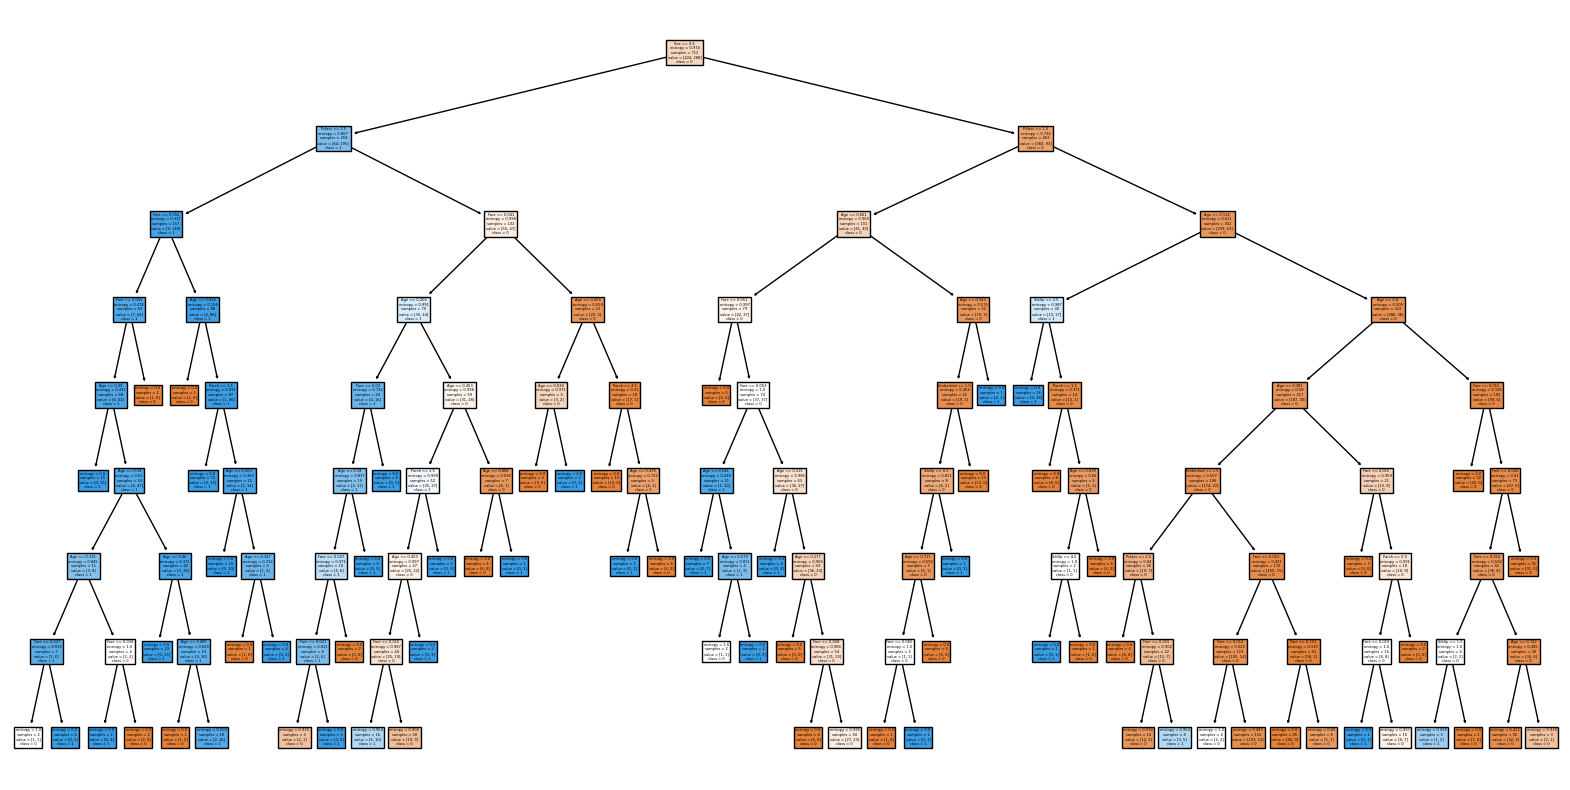

In [7]:
# Geramos a árvore de decisão utilizando gini como critério de cálculo de Information Gain
# clf = tree.DecisionTreeClassifier(criterion="gini", random_state=42)
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=8)
# clf = tree.DecisionTreeClassifier(criterion="log_loss", random_state=42)

#Treinamos o modelo utilizando treino X e treino Y
clf.fit(train_x, train_y)

# Predizemos o conteúdo do teste X
pred_y = clf.predict(test_x)

print("Accuracy:", metrics.accuracy_score(pred_y, test_y))
print("F1-score:", metrics.f1_score(pred_y, test_y, average='micro'))
print("Precision:", metrics.precision_score(pred_y, test_y, average='micro'))
print("Recall:", metrics.recall_score(pred_y, test_y, average='micro'))

# Plotando a árvore de decisão
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=train_x.columns, class_names=['0', '1'])
plt.show()

### Treinamento do modelo Random Forest

In [8]:
# Geramos a floreta gini como critério de cálculo de Information Gain
clf = RandomForestClassifier(n_estimators=80, criterion='entropy', random_state=42)

#Treinamos o modelo utilizando treino X e treino Y
clf.fit(train_x, train_y)

# Predizemos o conteúdo do teste X
pred_y = clf.predict(test_x)

print("Accuracy:", metrics.accuracy_score(pred_y, test_y))
print("F1-score:", metrics.f1_score(pred_y, test_y, average='micro'))
print("Precision:", metrics.precision_score(pred_y, test_y, average='micro'))
print("Recall:", metrics.recall_score(pred_y, test_y, average='micro'))

Accuracy: 0.8217522658610272
F1-score: 0.8217522658610272
Precision: 0.8217522658610272
Recall: 0.8217522658610272


### Otimização de hiperparâmetros para Random Forest

In [9]:
# Definir o espaço de hiperparâmetros para a Random Forest
param_space = {
    'n_estimators': (10, 200),
    'max_depth': (1, 32),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (2, 50),
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Definir K-Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Definir o modelo de Random Forest
rf = RandomForestClassifier()

# Inicializar o objeto de otimização bayesiana
opt = BayesSearchCV(
    rf,
    param_space,
    n_iter=50,  # Número de iterações de otimização
    cv=cv,       # Número de folds na validação cruzada
    n_jobs=-1,  # Número de núcleos a serem usados (-1 usa todos os núcleos disponíveis)
    verbose=0   # Mostrar informações durante a otimização
)

# Realizar a otimização bayesiana
opt.fit(train_x, train_y)

print("Melhores hiperparâmetros:", opt.best_params_)

Melhores hiperparâmetros: OrderedDict([('max_depth', 30), ('max_features', 'log2'), ('min_samples_leaf', 2), ('min_samples_split', 6), ('n_estimators', 197)])


In [10]:
# Definir o espaço de hiperparâmetros para a Random Forest
param_dist = {
    'n_estimators': np.arange(50, 201, 10),
    'max_depth': np.append(np.arange(1, 33), None),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Modelo de Random Forest
rf = RandomForestClassifier()

# Definir K-Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar o objeto de Random Search com K-Fold CV
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Realizar a otimização por Random Search com K-Fold CV
random_search.fit(train_x, train_y)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros (Random Search):", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores hiperparâmetros (Random Search): {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 21}


c:\Users\annal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [11]:
param_dist = {
    'n_estimators': np.arange(50, 100, 10),
    'max_depth': np.append(np.arange(1, 2), None),
    'min_samples_split': np.arange(2, 3),
    'min_samples_leaf': np.arange(1, 3),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Modelo de Random Forest
rf = RandomForestClassifier()

# Definir K-Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar o objeto de Grid Search com K-Fold CV
grid_search = GridSearchCV(
    rf,
    param_dist,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Realizar a otimização por Grid Search com K-Fold CV
grid_search.fit(train_x, train_y)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros (Grid Search):", grid_search.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


c:\Users\annal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Melhores hiperparâmetros (Grid Search): {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70}


### Avaliação dos resultados

Baseado nos resultados identificados após o treinamento dos modelos com os algoritmos KNN, Decision Tree e Random Forest, realizando a manipulação dos hiperparametros para encontrar as melhores métricas em cada um e baseando a análise no cálculo das métricas Accuracy, F1-score, Precisão e Recall, foi possível identificar que o modelo KNN apresentou os melhores resultados.